In [1]:
# importing libraries for data analysis and manipulation
import pandas as pd
import numpy as np

np.random.seed(42) # to make this notebook's output stable across runs

# For plotting figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Generating the version of a wide variety of packages/libraries used & working environment
#pd.__version__
#pd.show_versions(as_json=False)

In [2]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# `movies_final_3`

In [4]:
downloaded = drive.CreateFile({'id':'15H_8jf2Yr7uGM1namIgxzn-LMnTnF4DE'}) 
downloaded.GetContentFile('movies_final_3.csv') 

movies_final_3 = pd.read_csv('movies_final_3.csv') 
movies_final_3.shape

(55877, 17)

## Data Exploration and Statistical Analysis

In [5]:
movies_final_3.head()

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.2500,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON|PERSON|PERSON|ORG|...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,When siblings Judy and Peter discover an encha...,"{'neg': 0.161, 'neu': 0.702, 'pos': 0.137, 'co...",-0.4588,negative,5,War|Crime,PERSON|PERSON|ORG|PERSON|DATE|PERSON|CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,A family wedding reignites the ancient feud be...,"{'neg': 0.168, 'neu': 0.791, 'pos': 0.041, 'co...",-0.7645,negative,6,Family|Relatives,PERSON|PERSON|NORP|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
3,4,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,"Cheated on, mistreated and stepped on, the wom...","{'neg': 0.06, 'neu': 0.673, 'pos': 0.267, 'com...",0.8860,positive,1,Affairs|Mystery,PERSON|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
4,5,11862.0,Father of the Bride Part II (1995),Comedy,Just when George Banks has recovered from his ...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.5023,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON,1.0,0.0,0.0,0.0,0.0,1.0


In [6]:
movies_final_3.isnull().sum()

# missing values are all dataset -minus 300 labelled

movieId                      0
tmdbId                       0
title                        0
genres                       0
overview                     0
Vader_score                  0
Vader_compound               0
Vader_polarity               0
NMF_topic                    0
NMF_topic_description        0
entities                     0
happiness                55577
sadness                  55577
anger                    55577
disgust                  55577
fear                     55577
surprise                 55577
dtype: int64

In [7]:
print ("Number of unique movies: {}".format(movies_final_3.movieId.nunique()))

print ("Number of unique genres: {}".format(movies_final_3.genres.nunique()))

Number of unique movies: 55877
Number of unique genres: 1621


In [8]:
movies_final_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55877 entries, 0 to 55876
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                55877 non-null  int64  
 1   tmdbId                 55877 non-null  float64
 2   title                  55877 non-null  object 
 3   genres                 55877 non-null  object 
 4   overview               55877 non-null  object 
 5   Vader_score            55877 non-null  object 
 6   Vader_compound         55877 non-null  float64
 7   Vader_polarity         55877 non-null  object 
 8   NMF_topic              55877 non-null  int64  
 9   NMF_topic_description  55877 non-null  object 
 10  entities               55877 non-null  object 
 11  happiness              300 non-null    float64
 12  sadness                300 non-null    float64
 13  anger                  300 non-null    float64
 14  disgust                300 non-null    float64
 15  fe

## Splitting the data between labelled and unlabelled regarding emotion

In [9]:
# labelled dataframe
# 300 emotions to 300 movie overviews
# it should include 300 rows

data=[]
for row in movies_final_3.itertuples(index=True, name='Pandas'):
  if (row.happiness ==0 or row.happiness==1) or (row.sadness ==0 or row.sadness==1) or (row.anger==0 or row.anger==1) or (row.disgust==0 or row.disgust==1) or (row.fear==0 or row.fear==1) or (row.surprise==0 and row.surprise==1):
    data.append([row.movieId, row.tmdbId, row.title, row.genres, row.overview, row.Vader_score, row.Vader_compound, row.Vader_polarity, row.NMF_topic,
                 row.NMF_topic_description, row.entities, row.happiness, row.sadness, row.anger, row.disgust, row.fear, row.surprise])

labelled_df = pd.DataFrame(data, columns=['movieId', 'tmdbId', "title", 'genres', "overview", "Vader_score", "Vader_compound",
                                          "Vader_polarity", "NMF_topic", "NMF_topic_description", "entities", 
                                          "happiness", "sadness", "anger", "disgust", "fear", "surprise"
                                          ])
labelled_df.shape

(300, 17)

In [10]:
labelled_df.isnull().sum().any()

False

In [11]:
# unlabelled dataframe
# it should include initial number of rows - 300 = 55877 - 300 = 55,577 rows

data=[]
for row in movies_final_3.itertuples(index=True, name='Pandas'):
  if not((row.happiness ==0 or row.happiness==1) or (row.sadness ==0 or row.sadness==1) or (row.anger==0 or row.anger==1) or (row.disgust==0 or row.disgust==1) or (row.fear==0 or row.fear==1) or (row.surprise==0 and row.surprise==1)):
    data.append([row.movieId, row.tmdbId, row.title, row.genres, row.overview, row.Vader_score, row.Vader_compound, row.Vader_polarity, row.NMF_topic,
                 row.NMF_topic_description, row.entities, row.happiness, row.sadness, row.anger, row.disgust, row.fear, row.surprise])
    

unlabelled_df = pd.DataFrame(data, columns=['movieId', 'tmdbId', "title", 'genres', "overview", "Vader_score", "Vader_compound",
                                          "Vader_polarity", "NMF_topic", "NMF_topic_description", "entities", 
                                          "happiness", "sadness", "anger", "disgust", "fear", "surprise"
                                          ])
unlabelled_df.shape



(55577, 17)

In [12]:
unlabelled_df.isnull().sum()

movieId                      0
tmdbId                       0
title                        0
genres                       0
overview                     0
Vader_score                  0
Vader_compound               0
Vader_polarity               0
NMF_topic                    0
NMF_topic_description        0
entities                     0
happiness                55577
sadness                  55577
anger                    55577
disgust                  55577
fear                     55577
surprise                 55577
dtype: int64

In [13]:
labelled_df.happiness = labelled_df.happiness.astype(int)

labelled_df.sadness = labelled_df.sadness.astype(int)

labelled_df.anger = labelled_df.anger.astype(int)

labelled_df.disgust = labelled_df.disgust.astype(int)

labelled_df.fear = labelled_df.fear.astype(int)

labelled_df.surprise = labelled_df.surprise.astype(int)

In [14]:
labelled_df.isnull().sum().any()

False

# Models - Using Overviews & Movies Metadata

Building models for the prediction of emotions with features being only the movie overviews

# References

>[Susan Li](https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5) & [Susan Li](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Multi%20label%20text%20classification.ipynb
) &  [Susan Li](https://towardsdatascience.com/columntransformer-meets-natural-language-processing-da1f116dd69f
)  &
[Susan Li](https://github.com/susanli2016/NLP-with-Python/blob/master/ColumnTransformer%20Meets%20NLP.ipynb
) 



> [Kartik Nooney](https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff) & [Kartik Nooney](https://github.com/nkartik94/Multi-Label-Text-Classification/blob/master/Mark_6.ipynb)

> [scikit-multilearn](http://scikit.ml/api/skmultilearn.html#classifiers-and-tools)

> [Shubhan Jain](https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/)

> [Avishek Nag](https://medium.com/towards-artificial-intelligence/understanding-multi-label-classification-model-and-accuracy-metrics-1b2a8e2648ca)

> [Allison Honold
](https://towardsdatascience.com/using-columntransformer-to-combine-data-processing-steps-af383f7d5260) & [Allison Honold
](https://github.com/allisonhonold/column_transformer_ferry_wait_blog)

> [Amber Teng](https://towardsdatascience.com/dealing-with-multiclass-data-78a1a27c5dcc) & [Amber Teng](https://github.com/angelaaaateng/Projects/blob/master/Covertype_Prediction/Scripts/Tree-Based%20and%20Bagging%20Methods.ipynb) & [Amber Teng](https://github.com/angelaaaateng/Covertype_Analysis)

> [Allison Honold
](https://towardsdatascience.com/using-columntransformer-to-combine-data-processing-steps-af383f7d5260) & [Allison Honold
](https://github.com/allisonhonold/column_transformer_ferry_wait_blog)

> [Mohammed Terry-Jack
](https://medium.com/@b.terryjack/tips-and-tricks-for-multi-class-classification-c184ae1c8ffc)

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

### Data Preprocessing

Cleaning Data

Data preprocessing with regard to movie overviews:

* convert to lower-case
* removal of html tags, punctuation, non-alphabetic characters
* removal of stopwords, and adding some few other words in the stopwords list
* fixing some informal text in the vocabulary, e.g. what's -> what is
* stemming (transform/convert words with roughly the same semantics to one standard form. For example, for amusing, amusement, and amused, the stem would be amus.)

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings

"""
if not sys.warnoptions:
    warnings.simplefilter("ignore")
"""

'\nif not sys.warnoptions:\n    warnings.simplefilter("ignore")\n'

In [18]:
def clean_text(text):
    text = text.lower() 
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

def clean_html(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def clean_punctuations(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keep_alpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

# stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def remove_stopwords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

# stemming 
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


# apply in labelled dataframe
labelled_df["overview"]= labelled_df["overview"].apply(clean_text)

labelled_df["overview"]= labelled_df["overview"].apply(clean_html)

labelled_df["overview"]= labelled_df["overview"].apply(clean_punctuations)

labelled_df["overview"]= labelled_df["overview"].apply(keep_alpha)

labelled_df["overview"]= labelled_df["overview"].apply(remove_stopwords)

labelled_df["overview"]= labelled_df["overview"].apply(stemming)




labelled_df["title"]= labelled_df["title"].apply(clean_text)

labelled_df["title"]= labelled_df["title"].apply(clean_html)

labelled_df["title"]= labelled_df["title"].apply(clean_punctuations)

labelled_df["title"]= labelled_df["title"].apply(keep_alpha)

labelled_df["title"]= labelled_df["title"].apply(remove_stopwords)

labelled_df["title"]= labelled_df["title"].apply(stemming)



labelled_df["genres"]= labelled_df["genres"].apply(clean_text)

labelled_df["genres"]= labelled_df["genres"].apply(clean_html)

labelled_df["genres"]= labelled_df["genres"].apply(clean_punctuations)

labelled_df["genres"]= labelled_df["genres"].apply(keep_alpha)

labelled_df["genres"]= labelled_df["genres"].apply(remove_stopwords)

labelled_df["genres"]= labelled_df["genres"].apply(stemming)


labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(clean_text)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(clean_html)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(clean_punctuations)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(keep_alpha)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(remove_stopwords)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(stemming)




labelled_df["entities"]= labelled_df["entities"].apply(clean_text)

labelled_df["entities"]= labelled_df["entities"].apply(clean_html)

labelled_df["entities"]= labelled_df["entities"].apply(clean_punctuations)

labelled_df["entities"]= labelled_df["entities"].apply(keep_alpha)

labelled_df["entities"]= labelled_df["entities"].apply(remove_stopwords)

labelled_df["entities"]= labelled_df["entities"].apply(stemming)


'''
# apply in all dataframe
movies_final_3["overview"]= movies_final_3["overview"].apply(clean_text)

movies_final_3["overview"]= movies_final_3["overview"].apply(clean_html)

movies_final_3["overview"]= movies_final_3["overview"].apply(clean_punctuations)

movies_final_3["overview"]= movies_final_3["overview"].apply(keep_alpha)

movies_final_3["overview"]= movies_final_3["overview"].apply(remove_stopwords)

movies_final_3["overview"]= movies_final_3["overview"].apply(stemming)

'''

'''
# apply in unlabelled df
unlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_text)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_html)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_punctuations)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(keep_alpha)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(remove_stopwords)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(stemming)

'''


'\n# apply in unlabelled df\nunlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_text)\n\nunlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_html)\n\nunlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_punctuations)\n\nunlabelled_df["overview"]= unlabelled_df["overview"].apply(keep_alpha)\n\nunlabelled_df["overview"]= unlabelled_df["overview"].apply(remove_stopwords)\n\nunlabelled_df["overview"]= unlabelled_df["overview"].apply(stemming)\n\n'

In [19]:
# sample of how now the cleaned overviews look like in the labelled dataframe
labelled_df["overview"][:6]

0    georg bank recov daughter wed receiv news preg...
1    man daughter sudden taken championship hockey ...
2    epic look presid richard nixon man carri fate ...
3    ted bellhop first night job hotel unusu guest ...
4    summon ashram tibet ace find peril journey jun...
5    evil iago pretend friend othello order manipul...
Name: overview, dtype: object

In [20]:
# sample of how now the cleaned overviews look like in the whole dataframe
movies_final_3["overview"][:6]

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
5    Obsessive master thief, Neil McCauley leads a ...
Name: overview, dtype: object

In [21]:
labelled_df["Vader_score"] = labelled_df["Vader_score"].apply(lambda x: dict(eval(x)))

In [22]:
df_temp= labelled_df["Vader_score"].apply(pd.Series)
df_temp[:3]

,neg,neu,pos,compound
0,0.000,0.944,0.056,0.5023
1,0.099,0.759,0.143,0.4404
2,0.229,0.771,0.000,-0.8658


In [23]:
result= pd.concat([df_temp, labelled_df], axis=1).drop(["Vader_score", "Vader_compound"], axis=1)
result.shape
# 2 new columns added (2 columns removed, 4 were added)
# "Vader_score" is not needed anymore since its values are now displayed as new columns
# "Vader_compound" is replaced by the compound score inside the compound key values provided by the Vader_score
# Hence, we now have: "compound" (old "Vader_compound") | "neg"| "neu"| "pos"
# (300, 19)

(300, 19)

In [24]:
labelled_df=result
labelled_df.shape

(300, 19)

In [25]:
labelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   neg                    300 non-null    float64
 1   neu                    300 non-null    float64
 2   pos                    300 non-null    float64
 3   compound               300 non-null    float64
 4   movieId                300 non-null    int64  
 5   tmdbId                 300 non-null    float64
 6   title                  300 non-null    object 
 7   genres                 300 non-null    object 
 8   overview               300 non-null    object 
 9   Vader_polarity         300 non-null    object 
 10  NMF_topic              300 non-null    int64  
 11  NMF_topic_description  300 non-null    object 
 12  entities               300 non-null    object 
 13  happiness              300 non-null    int64  
 14  sadness                300 non-null    int64  
 15  anger 

In [26]:
labelled_df.head(1)

,neg,neu,pos,compound,movieId,tmdbId,title,genres,overview,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,0.0,0.944,0.056,0.5023,5,11862.0,father bride part ii,comedi,georg bank recov daughter wed receiv news preg...,positive,0,battl offenc,person person person person,1,0,0,0,0,1


In [27]:
# changing the order of columns

labelled_df =  labelled_df[["movieId","tmdbId","title","genres","overview","Vader_polarity","compound","neg","neu","pos","NMF_topic","NMF_topic_description","entities","happiness","sadness","anger","disgust","fear","surprise"]]
labelled_df.shape

(300, 19)

In [28]:
labelled_df.head(1)

,movieId,tmdbId,title,genres,overview,Vader_polarity,compound,neg,neu,pos,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,5,11862.0,father bride part ii,comedi,georg bank recov daughter wed receiv news preg...,positive,0.5023,0.0,0.944,0.056,0,battl offenc,person person person person,1,0,0,0,0,1


## Split into train-validation-test data



## Feature Engineering

>
* train data: 240/300 (80%)
* validation data: 30/300 (10%)
* test data: 30/300 (10%)

>> Feature selection: 
Apart from movie overviews, below 10 more attributes will be used for the construction of models for predicting the emotions


In [29]:
emotions = ["happiness", "sadness", "anger", "disgust", "fear", "surprise"]

from sklearn.model_selection import train_test_split


x_train_val, x_test, y_train_val, y_test= train_test_split(labelled_df[["title", "genres", "overview", "Vader_polarity", "compound", "neg", "neu", "pos", "NMF_topic", "NMF_topic_description", "entities"]] , labelled_df[["happiness", "sadness", "anger", "disgust", "fear", "surprise"]], test_size=0.1, random_state=42)

In [30]:
print("Shape of x_train_val is: {}".format(x_train_val.shape))
print("Shape of x_test is: {}".format(x_test.shape))
print("Shape of y_train_val is: {}".format(y_train_val.shape))
print("Shape of y_test is: {}".format(y_test.shape))

Shape of x_train_val is: (270, 11)
Shape of x_test is: (30, 11)
Shape of y_train_val is: (270, 6)
Shape of y_test is: (30, 6)


In [31]:
x_train, x_val, y_train, y_val= train_test_split(x_train_val, y_train_val, test_size=30, random_state=42)

In [32]:
print("Shape of x_train is: {}".format(x_train.shape))
print("Shape of x_val is: {}".format(x_val.shape))
print("Shape of x_test is: {}".format(x_test.shape))
print("==============================================")
print("Shape of y_train is: {}".format(y_train.shape))
print("Shape of y_val is: {}".format(y_val.shape))
print("Shape of y_test is: {}".format(y_test.shape))

Shape of x_train is: (240, 11)
Shape of x_val is: (30, 11)
Shape of x_test is: (30, 11)
Shape of y_train is: (240, 6)
Shape of y_val is: (30, 6)
Shape of y_test is: (30, 6)


In [33]:
labelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                300 non-null    int64  
 1   tmdbId                 300 non-null    float64
 2   title                  300 non-null    object 
 3   genres                 300 non-null    object 
 4   overview               300 non-null    object 
 5   Vader_polarity         300 non-null    object 
 6   compound               300 non-null    float64
 7   neg                    300 non-null    float64
 8   neu                    300 non-null    float64
 9   pos                    300 non-null    float64
 10  NMF_topic              300 non-null    int64  
 11  NMF_topic_description  300 non-null    object 
 12  entities               300 non-null    object 
 13  happiness              300 non-null    int64  
 14  sadness                300 non-null    int64  
 15  anger 

### Column Transformer & TFID vectorizer

#### Train 

In [34]:
# assigning the categorical variables

cat_var= ["title", "genres", "Vader_polarity", "NMF_topic_description", "entities"]


# assigning the numerical variables
num_var= ["neg", "neu", "pos", "compound", "NMF_topic"]

# assigning the text attribute "overview"
text_var= ["overview"]

In [35]:
print(type(cat_var))
print(type(num_var))
print(type(text_var))

<class 'list'>
<class 'list'>
<class 'list'>


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

col_transformers= ColumnTransformer(
    transformers=[
                  ("stand_scal", StandardScaler(), num_var),
                  ("one_hot_enc", OneHotEncoder(handle_unknown='ignore'), cat_var),           
                  ]
)

##### `Column Transformer`: fit_tranform to train  data

In [37]:
x_train_transformed= col_transformers.fit_transform(x_train)
x_train_transformed

# 240 x 457

<240x457 sparse matrix of type '<class 'numpy.float64'>'
	with 2400 stored elements in Compressed Sparse Row format>

##### `TFID`: fit_transform to train data

Applyting tfid vectorizer in the text data (overview) in the training set

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word',stop_words="english", ngram_range=(1,3), norm='l2')

In [39]:
# fit_transform the train set
x_train_tfid = tfid_vectorizer.fit_transform(list(x_train["overview"]))
x_train_tfid

# 240 x 17015

<240x17015 sparse matrix of type '<class 'numpy.float64'>'
	with 20754 stored elements in Compressed Sparse Row format>

In [40]:
'''
now the tranformed x_train with the numerical and categorical tranformations
should be merged with the tfid tranformation on the text data in order
to get all transformations correctly regarding the train dataset

- the categorical and numerical tranformations gave a (240 x 457) sparse matrix with 2400  stored elements in compressed Sparse Row format

- the tfid tranformation in the text data (movie overviews) gave a (240 x 17015) sparse matrix with 20754  stored elements in compressed Sparse Row format>

- converting the above pandas series objects into numpy arrays we got a final array of shape (240, 17472) which
is the final x_train with all tranformations applied (pipeline of numerical/categorical transformations plus tfid vectorizer)
'''

x_train_transformed = x_train_transformed.toarray()
x_train_tfid= x_train_tfid.toarray()

In [41]:
x_train_full_transformed= np.hstack((x_train_transformed, x_train_tfid)) 
x_train_full_transformed.shape

# final shape of x_train_full_transformed: (240, 17472)

(240, 17472)

In [42]:
type(x_train_full_transformed)

numpy.ndarray

### Column Transformer & TFID vectorizer

#### Validation & Test

##### `Column Transforer`: transform to **validation** & **test** data


In order later to make predictions in validation and test data. Here, care should be taken because validation and test data should be just transformed and not fit_tranformed [Geron, pg 79](https://suprimo.lib.strath.ac.uk/primo-explore/fulldisplay?docid=SUALMA21118078890002996&context=L&vid=SUNU01&lang=en_US&search_scope=LSCOP_SU&adaptor=Local%20Search%20Engine&isFrbr=true&tab=local&query=any,contains,geron%20hands%20on%20machine&sortby=rank&mode=simple)

In [43]:
# Transform the numerical and categorical tranformations in validation set

x_val_transformed= col_transformers.transform(x_val)
x_val_transformed

# 30 x 457

<30x457 sparse matrix of type '<class 'numpy.float64'>'
	with 248 stored elements in Compressed Sparse Row format>

In [44]:
# Transform the numerical and categorical tranformations in test set

x_test_transformed= col_transformers.transform(x_test)
x_test_transformed

# 30 x 457

<30x457 sparse matrix of type '<class 'numpy.float64'>'
	with 249 stored elements in Compressed Sparse Row format>

##### `TFID`: transform to validation and test data

Applyting tfid vectorizer in the text data (overview) in the validation and  test set

In [45]:
# transform the tfid tranformations in validation set

x_val_tfid = tfid_vectorizer.transform(list(x_val["overview"]))
x_val_tfid

# 30x17015

<30x17015 sparse matrix of type '<class 'numpy.float64'>'
	with 560 stored elements in Compressed Sparse Row format>

In [46]:
# transform the tfid tranformations in test data

x_test_tfid= tfid_vectorizer.transform(list(x_test["overview"]))
x_test_tfid

# 30 x 17015 

<30x17015 sparse matrix of type '<class 'numpy.float64'>'
	with 651 stored elements in Compressed Sparse Row format>

In [47]:
x_val_transformed = x_val_transformed.toarray()
x_val_tfid = x_val_tfid.toarray()

x_test_transformed = x_test_transformed.toarray()
x_test_tfid= x_test_tfid.toarray()

In [48]:
x_val_full_tranformed = np.hstack((x_val_transformed, x_val_tfid))
print("Shape of x_val_full_tranformed is: {}".format(x_val_full_tranformed.shape))

x_test_full_transformed= np.hstack((x_test_transformed, x_test_tfid)) 
print("Shape of x_test_full_transformed is: {}".format(x_test_full_transformed.shape))

# final valid shape: (30, 17472)
# final x_test shape: (30, 17472)

Shape of x_val_full_tranformed is: (30, 17472)
Shape of x_test_full_transformed is: (30, 17472)


In [49]:
x_train_final =  x_train_full_transformed
x_val_final = x_val_full_tranformed
x_test_final = x_test_full_transformed

> Final shapes:

In [50]:
print("Shape of x_train_final is: {}".format(x_train_final.shape))
print("Shape of x_val_final is: {}".format(x_val_final.shape))
print("Shape of x_test_final is: {}".format(x_test_final.shape))
print("==============================================")
print("Shape of y_train is: {}".format(y_train.shape))
print("Shape of y_val is: {}".format(y_val.shape))
print("Shape of y_test is: {}".format(y_test.shape))

Shape of x_train_final is: (240, 17472)
Shape of x_val_final is: (30, 17472)
Shape of x_test_final is: (30, 17472)
Shape of y_train is: (240, 6)
Shape of y_val is: (30, 6)
Shape of y_test is: (30, 6)


## Dictionary of Scores
Creating a dictionary of scores in order later to create comparative graphs

In [51]:
# keeping track of models
models_metadata= []

# Mean subset accuracy score
mean_sub_acc_metadata= []

# mean cross validation score
mean_cross_val_metadata= []

# Average micro f1 score
micro_f1_metadata = []

## Classifiers & Models

The prediction of emotions falls into a multi-label classification task, and therefore models which can support that should be used.

The classification problem will be treated as a 6-binary multi-class classification task, where the 2 classes will be 1 and 0 for every emotion displayed. 

Stohastic Gradient Descent (SGD) classifiers, Random Forest classifiers and Naïve Bayes classifiers are able to proceed to multiclass classification. Logistic Regression and Support Vector Machine (SVM) are primarily suitable as binary classifiers. However, there are ways multiclass classification can be implemented here with multiple binary classifiers: either with One Versus Rest (OvR), or with One versus One (Ovo) classifiers . In the case of OvR, six binary classifiers should be trained, one for each emotion out of the 6 emotions, combining the six classifiers’ outputs as an ensemble method With OvO, a binary classifier should be trained for every pair of emotions, e.g. one classifier distinguishing the emotion “happiness”  from “sadness”, the other classifier distinguishing “happiness” from “anger” and so on. In every case, Scikit-Learn can implicitly understand when a binary classification algorithm is used for multi-class classification, and automatically it runs OvR or OvO.



In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

### 1) Linear SVC

In [53]:
model = OneVsRestClassifier(LinearSVC(), n_jobs=1)

model_metadata = "Linear SVC"


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_metadata, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_metadata, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_metadata, mean_cross_val))


# plotting scores
models_metadata.append(model_metadata)
mean_sub_acc_metadata.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_metadata.append("%.4f" % round(f1_result, 4))
mean_cross_val_metadata.append("%.4f" % round(mean_cross_val, 4))

happiness:
Subset Accuracy of happiness in validation set is: 0.8666666666666667

Mean cross validation predictions score of Linear SVC model in 3-fold cross validation set are: 0.8791666666666668
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.6666666666666666

Mean cross validation predictions score of Linear SVC model in 3-fold cross validation set are: 0.7125
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.7333333333333333

Mean cross validation predictions score of Linear SVC model in 3-fold cross validation set are: 0.7791666666666667
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.8

### 2) SGDClassifier

In [54]:
from sklearn.linear_model import SGDClassifier


model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

model_metadata = "SGD"


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_metadata, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_metadata, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_metadata, mean_cross_val))


# plotting scores
models_metadata.append(model_metadata)
mean_sub_acc_metadata.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_metadata.append("%.4f" % round(f1_result, 4))
mean_cross_val_metadata.append("%.4f" % round(mean_cross_val, 4))

happiness:
Subset Accuracy of happiness in validation set is: 0.8333333333333334

Mean cross validation predictions score of SGD model in 3-fold cross validation set are: 0.8541666666666666
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.6333333333333333

Mean cross validation predictions score of SGD model in 3-fold cross validation set are: 0.7166666666666668
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.7

Mean cross validation predictions score of SGD model in 3-fold cross validation set are: 0.7583333333333333
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.8333333333333334

Mean cr

### 3) Random Forests

In [55]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier() 

model_metadata = "Random Forest"


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_metadata, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_metadata, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_metadata, mean_cross_val))


# plotting scores
models_metadata.append(model_metadata)
mean_sub_acc_metadata.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_metadata.append("%.4f" % round(f1_result, 4))
mean_cross_val_metadata.append("%.4f" % round(mean_cross_val, 4))

happiness:
Subset Accuracy of happiness in validation set is: 0.7

Mean cross validation predictions score of Random Forest model in 3-fold cross validation set are: 0.7791666666666667
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.7

Mean cross validation predictions score of Random Forest model in 3-fold cross validation set are: 0.7416666666666667
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.6666666666666666

Mean cross validation predictions score of Random Forest model in 3-fold cross validation set are: 0.65
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.7333333333333333

Mean c

### 4) KNeighbors

In [56]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model_metadata = "KNeighbors"


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_metadata, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_metadata, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_metadata, mean_cross_val))


# plotting scores
models_metadata.append(model_metadata)
mean_sub_acc_metadata.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_metadata.append("%.4f" % round(f1_result, 4))
mean_cross_val_metadata.append("%.4f" % round(mean_cross_val, 4))

happiness:
Subset Accuracy of happiness in validation set is: 0.7333333333333333

Mean cross validation predictions score of KNeighbors model in 3-fold cross validation set are: 0.8208333333333333
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.6666666666666666

Mean cross validation predictions score of KNeighbors model in 3-fold cross validation set are: 0.7416666666666667
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.6

Mean cross validation predictions score of KNeighbors model in 3-fold cross validation set are: 0.6875
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.6333333333333333

### 5) Logistic Regression

In [57]:
model = OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)

model_metadata = "Logistic_Reg"


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_metadata, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_metadata, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_metadata, mean_cross_val))


# plotting scores
models_metadata.append(model_metadata)
mean_sub_acc_metadata.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_metadata.append("%.4f" % round(f1_result, 4))
mean_cross_val_metadata.append("%.4f" % round(mean_cross_val, 4))

happiness:
Subset Accuracy of happiness in validation set is: 0.8333333333333334

Mean cross validation predictions score of Logistic_Reg model in 3-fold cross validation set are: 0.8416666666666667
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.6333333333333333

Mean cross validation predictions score of Logistic_Reg model in 3-fold cross validation set are: 0.7125
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.7

Mean cross validation predictions score of Logistic_Reg model in 3-fold cross validation set are: 0.7708333333333334
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.8666666666

### 6) Softmax

In [58]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, random_state=42, max_iter=1000)

model_metadata = "Softmax"


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_metadata, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_metadata, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_metadata, mean_cross_val))


# plotting scores
models_metadata.append(model_metadata)
mean_sub_acc_metadata.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_metadata.append("%.4f" % round(f1_result, 4))
mean_cross_val_metadata.append("%.4f" % round(mean_cross_val, 4))

happiness:
Subset Accuracy of happiness in validation set is: 0.8666666666666667

Mean cross validation predictions score of Softmax model in 3-fold cross validation set are: 0.8624999999999999
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.7

Mean cross validation predictions score of Softmax model in 3-fold cross validation set are: 0.7125
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.7

Mean cross validation predictions score of Softmax model in 3-fold cross validation set are: 0.775
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.8333333333333334

Mean cross validation predictions s

## Comparative Graph

In [59]:
print("The number of models using movie overviews and metadata is {0} and these are:\n {1}".format(len(models_metadata), models_metadata))

The number of models using movie overviews and metadata is 6 and these are:
 ['Linear SVC', 'SGD', 'Random Forest', 'KNeighbors', 'Logistic_Reg', 'Softmax']


In [60]:
print("The micro average f1 scores are: {}".format(micro_f1_metadata))

The micro average f1 scores are: ['0.6569', '0.6569', '0.5469', '0.5352', '0.6324', '0.6423']


In [61]:
print("The mean cross validation scores are: {}".format(mean_cross_val_metadata))

The mean cross validation scores are: ['0.7576', '0.7451', '0.6882', '0.7069', '0.7493', '0.7549']


In [62]:
print("The mean subset accuracy scores are: {}".format(mean_sub_acc_metadata))

The mean subset accuracy scores are: ['0.7389', '0.7389', '0.6778', '0.6333', '0.7222', '0.7278']


> Overall, the best perfomarce in validation data is found by LinearSVC and SGD with an equal average micro f1 score of 65.65%, mean cross validation score 75.76% and 74.51% accordingly, and an equal mean subset accuracy score of 73.89%

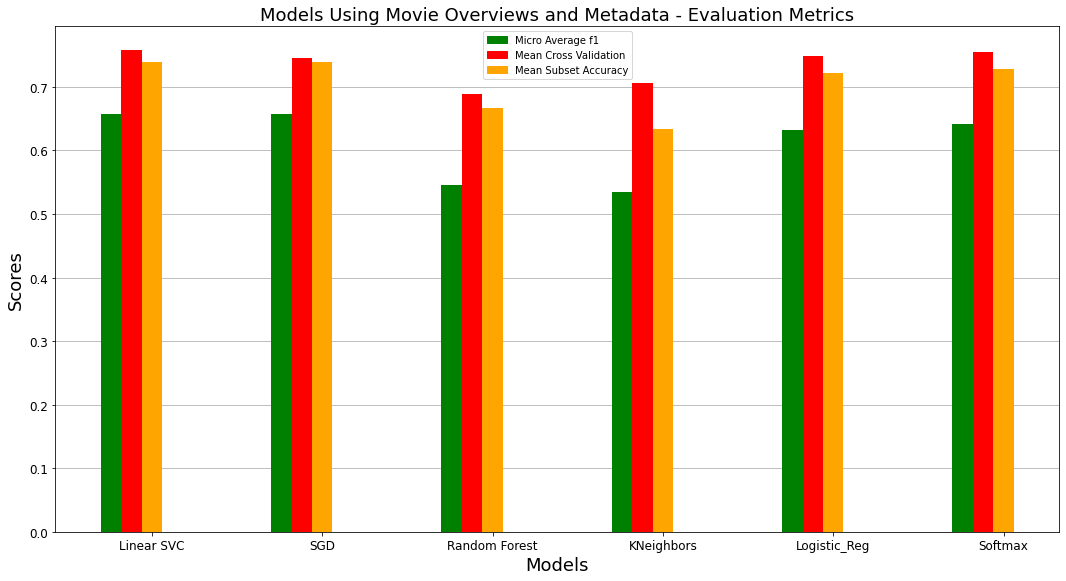

In [63]:
import matplotlib.patches as mpatches

plt.figure(figsize=(18,9.3))
#labels
y1= [0.6569, 0.6569, 0.5455, 0.5352, 0.6324, 0.6423] # micro_f1_metadata
y2= [0.7576, 0.7451, 0.6882, 0.7069, 0.7493, 0.7549] # mean_cross_val_metadata
y3= [0.7389, 0.7389, 0.6667, 0.6333, 0.7222, 0.7278] # mean_sub_acc_metadata
x= np.arange(len(y1))


bar_width= 0.12
plt.bar(x, y1, width=bar_width, color="green", zorder=2)
plt.bar(x+ bar_width, y2, width=bar_width, color="red", zorder=2)
plt.bar(x+ bar_width*2, y3, width=bar_width, color="orange", zorder=2)

plt.xticks(x+ bar_width*2, models_metadata)
plt.title("Models Using Movie Overviews and Metadata - Evaluation Metrics", fontsize=18)
plt.xlabel("Models", fontsize=18)
plt.ylabel("Scores", fontsize=18)

green_patch= mpatches.Patch(color="green", label="Micro Average f1")
red_patch= mpatches.Patch(color="red", label="Mean Cross Validation")
orange_patch= mpatches.Patch(color="orange", label="Mean Subset Accuracy")
plt.legend(handles= [green_patch,red_patch, orange_patch ])

plt.grid(axis="y")

plt.show()

## Fine-Tune the promising models

Having found some promising models, we can now fine tune them with grid search funtion and find out the best parameters (optimally fine tune the model). These parameters also can be used to control underfitting or overfitting of model when the evaluation in validation set (in 3 fold cross validation) is compared with that on test set

### SGDClassifier with Grid Search

In [64]:
SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [65]:
from sklearn.model_selection import GridSearchCV

grid_parameters = {
   "penalty": ["l1","l2"],
   "alpha": [0.0001, 0.0010, 0.010],
   "tol": [1e-3, 1e-1],
   "epsilon": [0.1, 0.5, 0.1],
   "early_stopping": [True]
  
}

model= SGDClassifier()

grid_search= GridSearchCV(estimator=model, param_grid=grid_parameters, n_jobs=-1, cv=3, verbose=2, return_train_score=True)

In [66]:
for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    grid_search.fit(x_train_final, y_train[emotion])

happiness:
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   10.4s finished


sadness:
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   10.9s finished


anger:
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   11.1s finished


disgust:
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   11.1s finished


fear:
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   10.1s finished


surprise:
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   11.5s finished


In [67]:
grid_search.best_params_

{'alpha': 0.0001,
 'early_stopping': True,
 'epsilon': 0.5,
 'penalty': 'l2',
 'tol': 0.001}

In [68]:
grid_search.best_estimator_

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=True, epsilon=0.5, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

#### Predictions in Validation data

In [69]:
model = grid_search.best_estimator_

model_metadata = "grid_search.best_estimator_"+"(SGD)"

# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_metadata, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_metadata, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_metadata, mean_cross_val))

happiness:
Subset Accuracy of happiness in validation set is: 0.8666666666666667

Mean cross validation predictions score of grid_search.best_estimator_(SGD) model in 3-fold cross validation set are: 0.8458333333333333
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.6666666666666666

Mean cross validation predictions score of grid_search.best_estimator_(SGD) model in 3-fold cross validation set are: 0.6833333333333335
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.7

Mean cross validation predictions score of grid_search.best_estimator_(SGD) model in 3-fold cross validation set are: 0.7458333333333332
--------------------------------------------------------------------------------------------------------------------------

#### Predictions in Test data

In [70]:
model = grid_search.best_estimator_

model_metadata = "grid_search.best_estimator_"+"(SGD)"

# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_test_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of test set (since now evaluation will take place in the test set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))

    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1

mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in test set is :{1} ".format(model_metadata, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in test set is: {1}".format(model_metadata, f1_result))

happiness:
Subset Accuracy of happiness in test set is: 0.9

--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in test set is: 0.6

--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in test set is: 0.7666666666666667

--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in test set is: 0.7333333333333333

fear:
Subset Accuracy of fear in test set is: 0.7666666666666667

--------------------------------------------------------------------------------------------------------------------------

surprise:
Subset Accuracy of surprise in test set is: 0.5

-------------------------------------------------------------------------------------------------------------------------

### Linear SVC with Grid Search

Linear SVC so far has achieved f1 score: 65.69% in validation set

In [71]:
from sklearn.model_selection import GridSearchCV

grid_parameters = {
   "penalty": ["l1","l2"],
   "dual": [True, False],
   "tol": [1e-4, 1e-2],
   "C": [1.,2.,5.,15.,30],
   "multi_class": ["ovr"],
   "class_weight": ["balanced", None]
  
}

model= LinearSVC()

grid_search= GridSearchCV(estimator=model, param_grid=grid_parameters, n_jobs=-1, cv=3, verbose=2, return_train_score=True)

In [72]:
for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    grid_search.fit(x_train_final, y_train[emotion])

happiness:
Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


sadness:
Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


anger:
Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


disgust:
Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


fear:
Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


surprise:
Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    7.0s finished


In [73]:
grid_search.best_params_

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': True,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'tol': 0.0001}

In [74]:
grid_search.best_estimator_

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

#### Predictions in Validation data

In [75]:
model = grid_search.best_estimator_

model_metadata = "grid_search.best_estimator_"+"(SVC)"

# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1

mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_metadata, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_metadata, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_metadata, mean_cross_val))

happiness:
Subset Accuracy of happiness in validation set is: 0.8666666666666667

Mean cross validation predictions score of grid_search.best_estimator_(SVC) model in 3-fold cross validation set are: 0.8708333333333332
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.7

Mean cross validation predictions score of grid_search.best_estimator_(SVC) model in 3-fold cross validation set are: 0.725
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.7666666666666667

Mean cross validation predictions score of grid_search.best_estimator_(SVC) model in 3-fold cross validation set are: 0.7833333333333333
--------------------------------------------------------------------------------------------------------------------------

disgust:
Su

#### Predictions in Test data

The model is overfitting the training data since f1 score in validation set is 65.69% contrary to a 53.79% f1 score in test set

In [76]:
model = grid_search.best_estimator_

model_metadata = "grid_search.best_estimator_"+"(SVC)"

# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_test_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of test set (since now evaluation will take place in the test set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))

    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in test set is :{1} ".format(model_metadata, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in test set is: {1}".format(model_metadata, f1_result))

happiness:
Subset Accuracy of happiness in test set is: 0.9

--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in test set is: 0.7

--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in test set is: 0.8333333333333334

--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in test set is: 0.8666666666666667

fear:
Subset Accuracy of fear in test set is: 0.7333333333333333

--------------------------------------------------------------------------------------------------------------------------

surprise:
Subset Accuracy of surprise in test set is: 0.5

-------------------------------------------------------------------------------------------------------------------------

Overally, so far the best results are found in LinearSVC model. Specifically, via grid search best parameters it achieved higher score in micro average f1 score (66.66% vs 65.69), in mean cross validation score (76.18 vs 75.76) and in mean subset accuracy score (75.55 vs 74.44) with regard to the validation data. However, in the training data we have increased levels of overfitting the training data: f1 score in train set is 53.79% and mean subeset accuracy 75.55%.

Grid search best parameters also boosted SGDClassifier's performance, however this model had even higher levels of overfitting (average micro f1: 49.29%) and for this reason this model is pulled out of our choices

##### Feature Importances 

Feature Importances via Random Forest Classifier and Grid Search

[
Naren Santhanam
](https://towardsdatascience.com/explain-your-machine-learning-with-feature-importance-774cd72abe)



In [77]:
'''
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
grid_parameters = {
   "n_estimators": [80,90,100,130,250],
   "criterion": ["gini", "entropy"],
   "max_features": [7,8,10,12],
}

model= RandomForestClassifier() 

grid_search= GridSearchCV(estimator=model, param_grid=grid_parameters, n_jobs=-1, cv=3, verbose=2, return_train_score=True)

'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom scipy.stats import randint\ngrid_parameters = {\n   "n_estimators": [80,90,100,130,250],\n   "criterion": ["gini", "entropy"],\n   "max_features": [7,8,10,12],\n}\n\nmodel= RandomForestClassifier() \n\ngrid_search= GridSearchCV(estimator=model, param_grid=grid_parameters, n_jobs=-1, cv=3, verbose=2, return_train_score=True)\n\n'

In [78]:
'''
for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    grid_search.fit(x_train_final, y_train[emotion])
'''

"\nfor emotion in emotions:\n    print('{}:'.format(emotion))\n    \n    # Training model on train data\n    grid_search.fit(x_train_final, y_train[emotion])\n"

In [79]:
#grid_search.best_params_

In [80]:
#grid_search.best_estimator_

In [81]:
'''
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances
'''

'\nfeature_importances=grid_search.best_estimator_.feature_importances_\nfeature_importances\n'

In [82]:
'''
col_sorted_by_importance=grid_search.best_estimator_.feature_importances_.argsort()
col_sorted_by_importance
'''

'\ncol_sorted_by_importance=grid_search.best_estimator_.feature_importances_.argsort()\ncol_sorted_by_importance\n'

In [83]:
'''
cat_encoder = col_transformers.named_transformers_["one_hot_enc"]

cat_one_hot_attribs = list(cat_encoder.categories_[0])

attributes = num_var + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)
'''

'\ncat_encoder = col_transformers.named_transformers_["one_hot_enc"]\n\ncat_one_hot_attribs = list(cat_encoder.categories_[0])\n\nattributes = num_var + cat_one_hot_attribs\n\nsorted(zip(feature_importances, attributes), reverse=True)\n'

As it can be seen, the feature "title" seems not to be important for the model, and also it may confuse it forcing worse and not better results. Hence, the best model will be re-created without this attribute

#### Finalize the best model

Re-creation of all transformations without the attribute "title", and using the best model (linearSVC) with the best parameters found via grid search.

(We cannot just drop "title", since x_train_final has been converted into an array of numerical and encoded categorical attributes )

##### Re-creation 
Re-creation of model without "title"

In [84]:
emotions = ["happiness", "sadness", "anger", "disgust", "fear", "surprise"]

from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test= train_test_split(labelled_df[["genres", "overview", "Vader_polarity", "compound", "neg", "neu", "pos", "NMF_topic", "NMF_topic_description", "entities"]] , labelled_df[["happiness", "sadness", "anger", "disgust", "fear", "surprise"]], test_size=0.1, random_state=42)

In [85]:
print("Shape of x_train_val is: {}".format(x_train_val.shape))
print("Shape of x_test is: {}".format(x_test.shape))
print("Shape of y_train_val is: {}".format(y_train_val.shape))
print("Shape of y_test is: {}".format(y_test.shape))

Shape of x_train_val is: (270, 10)
Shape of x_test is: (30, 10)
Shape of y_train_val is: (270, 6)
Shape of y_test is: (30, 6)


In [86]:
x_train, x_val, y_train, y_val= train_test_split(x_train_val, y_train_val, test_size=30, random_state=42)

In [87]:
print("Shape of x_train is: {}".format(x_train.shape))
print("Shape of x_val is: {}".format(x_val.shape))
print("Shape of x_test is: {}".format(x_test.shape))
print("==============================================")
print("Shape of y_train is: {}".format(y_train.shape))
print("Shape of y_val is: {}".format(y_val.shape))
print("Shape of y_test is: {}".format(y_test.shape))

Shape of x_train is: (240, 10)
Shape of x_val is: (30, 10)
Shape of x_test is: (30, 10)
Shape of y_train is: (240, 6)
Shape of y_val is: (30, 6)
Shape of y_test is: (30, 6)


In [88]:
# assigning the categorical variables
cat_var= ["genres", "Vader_polarity", "NMF_topic_description", "entities"]

# assigning the numerical variables
num_var= ["neg", "neu", "pos", "compound", "NMF_topic"]

# assigning the text attribute "overview"
text_var= ["overview"]

In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

col_transformers= ColumnTransformer(
    transformers=[
                  ("stand_scal", StandardScaler(), num_var),
                  ("one_hot_enc", OneHotEncoder(handle_unknown='ignore'), cat_var),           
                  ]
)

In [90]:
x_train_transformed= col_transformers.fit_transform(x_train)
x_train_transformed

# 240 x 217

<240x217 sparse matrix of type '<class 'numpy.float64'>'
	with 2160 stored elements in Compressed Sparse Row format>

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word',stop_words="english", ngram_range=(1,3), norm='l2')

In [92]:
# fit_transform the train set
x_train_tfid = tfid_vectorizer.fit_transform(list(x_train["overview"]))
x_train_tfid

# 240 x 17015

<240x17015 sparse matrix of type '<class 'numpy.float64'>'
	with 20754 stored elements in Compressed Sparse Row format>

In [93]:
x_train_transformed = x_train_transformed.toarray()
x_train_tfid= x_train_tfid.toarray()

In [94]:
x_train_full_transformed= np.hstack((x_train_transformed, x_train_tfid)) 
x_train_full_transformed.shape

(240, 17232)

In [95]:
# Transform the numerical and categorical tranformations in validation set

x_val_transformed= col_transformers.transform(x_val)
x_val_transformed

# 30x217

<30x217 sparse matrix of type '<class 'numpy.float64'>'
	with 247 stored elements in Compressed Sparse Row format>

In [96]:
# Transform the numerical and categorical tranformations in test set

x_test_transformed= col_transformers.transform(x_test)
x_test_transformed

# 30x217

<30x217 sparse matrix of type '<class 'numpy.float64'>'
	with 249 stored elements in Compressed Sparse Row format>

In [97]:
# transform the tfid tranformations in validation set

x_val_tfid = tfid_vectorizer.transform(list(x_val["overview"]))
x_val_tfid

# 30x17015

<30x17015 sparse matrix of type '<class 'numpy.float64'>'
	with 560 stored elements in Compressed Sparse Row format>

In [98]:
# transform the tfid tranformations in test data

x_test_tfid= tfid_vectorizer.transform(list(x_test["overview"]))
x_test_tfid

# 30 x 17015 

<30x17015 sparse matrix of type '<class 'numpy.float64'>'
	with 651 stored elements in Compressed Sparse Row format>

In [99]:
x_val_transformed = x_val_transformed.toarray()
x_val_tfid = x_val_tfid.toarray()

x_test_transformed = x_test_transformed.toarray()
x_test_tfid= x_test_tfid.toarray()

In [100]:
x_val_full_tranformed = np.hstack((x_val_transformed, x_val_tfid))
print("Shape of x_val_full_tranformed is: {}".format(x_val_full_tranformed.shape))

x_test_full_transformed= np.hstack((x_test_transformed, x_test_tfid)) 
print("Shape of x_test_full_transformed is: {}".format(x_test_full_transformed.shape))

# final valid shape: (30, 17472)
# final x_test shape: (30, 17472)

Shape of x_val_full_tranformed is: (30, 17232)
Shape of x_test_full_transformed is: (30, 17232)


In [101]:
x_train_final =  x_train_full_transformed
x_val_final = x_val_full_tranformed
x_test_final = x_test_full_transformed

In [102]:
print("Shape of x_train_final is: {}".format(x_train_final.shape))
print("Shape of x_val_final is: {}".format(x_val_final.shape))
print("Shape of x_test_final is: {}".format(x_test_final.shape))
print("==============================================")
print("Shape of y_train is: {}".format(y_train.shape))
print("Shape of y_val is: {}".format(y_val.shape))
print("Shape of y_test is: {}".format(y_test.shape))

Shape of x_train_final is: (240, 17232)
Shape of x_val_final is: (30, 17232)
Shape of x_test_final is: (30, 17232)
Shape of y_train is: (240, 6)
Shape of y_val is: (30, 6)
Shape of y_test is: (30, 6)


##### LinearSCV

In [103]:
model = OneVsRestClassifier(LinearSVC(), n_jobs=1)

model_metadata = "Linear SVC"


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1

mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_metadata, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_metadata, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_metadata, mean_cross_val))


happiness:
Subset Accuracy of happiness in validation set is: 0.8666666666666667

Mean cross validation predictions score of Linear SVC model in 3-fold cross validation set are: 0.8708333333333332
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.6666666666666666

Mean cross validation predictions score of Linear SVC model in 3-fold cross validation set are: 0.7083333333333334
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.7333333333333333

Mean cross validation predictions score of Linear SVC model in 3-fold cross validation set are: 0.7875
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.8

###### Grid-Search

In [104]:
from sklearn.model_selection import GridSearchCV

grid_parameters = {
   "penalty": ["l1","l2"],
   "dual": [True, False],
   "tol": [1e-4, 1e-2],
   "C": [1.,2.,5.,15.,30],
   "multi_class": ["ovr"],
   "class_weight": ["balanced", None]
  
}

model= LinearSVC()

grid_search= GridSearchCV(estimator=model, param_grid=grid_parameters, n_jobs=-1, cv=3, verbose=2, return_train_score=True)

In [105]:
for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    grid_search.fit(x_train_final, y_train[emotion])

happiness:
Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


sadness:
Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    7.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


anger:
Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


disgust:
Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


fear:
Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


surprise:
Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    7.1s finished


In [106]:
grid_search.best_params_

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': True,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'tol': 0.0001}

In [107]:
grid_search.best_estimator_

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

###### Predictions in Validation data

In [108]:
model = grid_search.best_estimator_

model_metadata = "grid_search.best_estimator_"+"(SVC)"

# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_metadata, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1

mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_metadata, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_metadata, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_metadata, mean_cross_val))

happiness:
Subset Accuracy of happiness in validation set is: 0.8333333333333334

Mean cross validation predictions score of grid_search.best_estimator_(SVC) model in 3-fold cross validation set are: 0.875
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.6666666666666666

Mean cross validation predictions score of grid_search.best_estimator_(SVC) model in 3-fold cross validation set are: 0.7166666666666667
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.7666666666666667

Mean cross validation predictions score of grid_search.best_estimator_(SVC) model in 3-fold cross validation set are: 0.7791666666666668
------------------------------------------------------------------------------------------------------------------------

###### Predictions in Test data

In [109]:

model = grid_search.best_estimator_

model_metadata = "grid_search.best_estimator_"+"(SVC)"

# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_test_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of test set (since now evaluation will take place in the test set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))

    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1

mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in test set is :{1} ".format(model_metadata, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in test set is: {1}".format(model_metadata, f1_result))

happiness:
Subset Accuracy of happiness in test set is: 0.9

--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in test set is: 0.6333333333333333

--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in test set is: 0.8333333333333334

--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in test set is: 0.8666666666666667

fear:
Subset Accuracy of fear in test set is: 0.7666666666666667

--------------------------------------------------------------------------------------------------------------------------

surprise:
Subset Accuracy of surprise in test set is: 0.5

----------------------------------------------------------------------------------------------------------

> As a result, by using feature importances the best model improved slightly. Specifically, it achieved a micro average f1 score 69.06% in validation data and 54.79% in test data (compared to the previous 66.67% and 53.79% scores respectively)

###### Split 85-15 & Feature Selection Experiments

Now that we know how much this model can generalise on unseen data, I will fit it with 85% train set and make predictions directly to test data. If the labelling quantity was higher, i.e. if the dataset was bigger then this movement would be wrong, because you should predict in test set in the same way you have predicted in the validation set, in order to infere valid conclusions. However, I am proceeding to this only because the amount of data is small, and in case the model can learn more from that and with less noise on data. As it can be understood, in case the model performs better in this way, we cannot be sure that this can be generalised because we cannot be able to verify it (shortage of labelled data)

> Therefore, below taking the last (and best) model, with totally 5 predictors and train - test split of 85% - 15%

In [110]:
emotions = ["happiness", "sadness", "anger", "disgust", "fear", "surprise"]

train, test = train_test_split(labelled_df, random_state=42, test_size=0.15, shuffle=True)

In [111]:
x_train = train[["overview", "Vader_polarity", "compound", "NMF_topic", "genres"]] 
x_test = test[["overview", "Vader_polarity", "compound", "NMF_topic", "genres"]] 

y_train = train[["happiness", "sadness", "anger", "disgust", "fear", "surprise"]]
y_test= test[["happiness", "sadness", "anger", "disgust", "fear", "surprise"]]

print("Shape of x_train is: {}".format(x_train.shape))
print("Shape of x_test is: {}".format(x_test.shape))
print("Shape of y_train is: {}".format(y_train.shape))
print("Shape of y_test is: {}".format(y_test.shape))

Shape of x_train is: (255, 5)
Shape of x_test is: (45, 5)
Shape of y_train is: (255, 6)
Shape of y_test is: (45, 6)


In [112]:
# assigning the categorical variables

cat_var= ["Vader_polarity", "genres"]


# assigning the numerical variables
num_var= ["compound", "NMF_topic"]

# assigning the text attribute "overview"
text_var= ["overview"]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

col_transformers= ColumnTransformer(
    transformers=[
                  ("stand_scal", StandardScaler(), num_var),
                  ("one_hot_enc", OneHotEncoder(handle_unknown='ignore'), cat_var),           
                  ]
)

In [113]:
x_train_transformed= col_transformers.fit_transform(x_train)
x_train_transformed

# 255x228

<255x16 sparse matrix of type '<class 'numpy.float64'>'
	with 1020 stored elements in Compressed Sparse Row format>

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word',stop_words="english", ngram_range=(1,3), norm='l2')

In [115]:
# fit_transform the train set
x_train_tfid = tfid_vectorizer.fit_transform(list(x_train["overview"]))
x_train_tfid

# 255x17655

<255x17655 sparse matrix of type '<class 'numpy.float64'>'
	with 21632 stored elements in Compressed Sparse Row format>

In [116]:
# sparse to array
x_train_transformed = x_train_transformed.toarray()
x_train_tfid= x_train_tfid.toarray()

In [117]:
x_train_full_transformed= np.hstack((x_train_transformed, x_train_tfid)) 
x_train_full_transformed.shape

# (255, 17883)

(255, 17671)

In [118]:
# Transform the numerical and categorical tranformations in test set

x_test_transformed= col_transformers.transform(x_test)
x_test_transformed

# 45x228 

<45x16 sparse matrix of type '<class 'numpy.float64'>'
	with 180 stored elements in Compressed Sparse Row format>

In [119]:
# transform the tfid tranformations in test data

x_test_tfid= tfid_vectorizer.transform(list(x_test["overview"]))
x_test_tfid

# 45x17655

<45x17655 sparse matrix of type '<class 'numpy.float64'>'
	with 976 stored elements in Compressed Sparse Row format>

In [120]:
x_test_transformed = x_test_transformed.toarray()
x_test_tfid= x_test_tfid.toarray()

In [121]:
x_test_full_transformed= np.hstack((x_test_transformed, x_test_tfid)) 
print("Shape of x_test_full_transformed is: {}".format(x_test_full_transformed.shape))

# final x_test shape: (45, 17883)

Shape of x_test_full_transformed is: (45, 17671)


In [122]:
x_train_final= x_train_full_transformed
x_test_final = x_test_full_transformed

In [123]:
print("Shape of x_train_final is: {}".format(x_train_final.shape))
print("Shape of x_test_final is: {}".format(x_test_final.shape))
print("==============================================")
print("Shape of y_train is: {}".format(y_train.shape))
print("Shape of y_test is: {}".format(y_test.shape))

Shape of x_train_final is: (255, 17671)
Shape of x_test_final is: (45, 17671)
Shape of y_train is: (255, 6)
Shape of y_test is: (45, 6)


In [124]:
# best model based on the previous sections, finding these
# parameters based on the grid search best parameters:
model= LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

model_metadata = "LinearSVC with Grid Search"

# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_test_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of test set (since now evaluation will take place in the test set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))

    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1

mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in test set is :{1} ".format(model_metadata, mean_subset_accurary))

y_true= y_test.values
y_pred= predictions_df.values

f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in test set is: {1}".format(model_metadata, f1_result))

happiness:
Subset Accuracy of happiness in test set is: 0.9111111111111111

--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in test set is: 0.8

--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in test set is: 0.8222222222222222

--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in test set is: 0.8666666666666667

fear:
Subset Accuracy of fear in test set is: 0.7333333333333333

--------------------------------------------------------------------------------------------------------------------------

surprise:
Subset Accuracy of surprise in test set is: 0.5777777777777777

-------------------------------------------------------------------------------------------

In conclusion, by training with the 85% of the available data, i.e. with 5% more training data than the previous sections, the micro average f1 score was increased sharply by about 16.7% (reaching 71.49%) and the mean subset accuracy by about 1.6% (reaching 76.66%). However, as it was told earlier, we cannot be sure about the generalization validity of this model since with the same amount of training data we cannot simultaneously gain a validation set which would verify the results in the test data. On the other hand, the percentage of test set, in this way, increased by 5%, and since the same model was validated earlier with cross validation sets, it can be supported that although some overfitting of training data would still be on surface (although now we cannot verify it), that this model can be more suitable for the prediction of emotions in the rest 55,577 movies. With some final modifications and more experiments over feature selection, the final model consisted with fewer predictors and these were: **genres, Vader's polarity, Vader's compound score, NMF topic, and movie overviews**. This model gave a micro average **f1 score 73.15%**, whereas the **mean subset accuracy** stood at **78.52%**

In [125]:
len(predictions_df)

45

In [126]:
# df of predictions (in a binary form)
predictions_df

,happiness,sadness,anger,disgust,fear,surprise
0,0,0,0,0,1,1
1,1,0,1,0,1,1
2,0,0,0,0,0,1
3,0,1,0,0,1,1
4,0,0,1,0,1,0
5,1,0,0,0,1,1
6,0,0,0,0,1,0
7,0,1,1,1,1,1
8,0,1,0,1,1,1
9,0,0,0,1,1,1


In [127]:
# grabing the probabilities of predictions of the model
model= LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_proba_df = pd.DataFrame() 

for emotion in emotions:
        
    # Training model on train data
    model.fit(x_train_final, train[emotion])
    
    # Making predictions in validation data
    predictions_proba = model.decision_function(x_test_final)

    if count==1:
      predictions_proba_df["happiness"] = predictions_proba

    elif count==2:
      predictions_proba_df["sadness"] = predictions_proba

    elif count==3:
      predictions_proba_df["anger"] = predictions_proba

    elif count==4:
      predictions_proba_df["disgust"] = predictions_proba

    elif count==5:
      predictions_proba_df["fear"] = predictions_proba

    else:
      predictions_proba_df["surprise"] = predictions_proba

    count=count+1


In [128]:
len(predictions)

45

In [129]:
len(predictions_proba)

45